In [278]:
# Polynomial Linear Regression is similar to SLR is the sense that it is also based on one dependant variable x1.
# but it has increasing powers of x. The equation is
# y = b0 + b1x1 + b2x1^2 + b3x1^3 + ... + bnx1^n

# But if we have powers of x, why is it still called Linear Regression??
# Answer: Its called linear not because of the powers of x. It's called linear because of the coefficients. Whether or
# not this function can be expressed as a linear combination of these coefficients.

# So although Polynomial regression fits a nonlinear relationship between the value of x. it is still called a linear
# estimator because the regression function is linear. Examples of PLR are finding growth rate of tissues, finding
# the progression of disease epidemics.

# An example of non-linear would be y = (b0+b1x1)/(b2x1 - b3x1) --> ie some other combination of expressions
# A PLR is a special case of MLR where we use the MLR sklearn class with an exponential parameter

# But if someone asks if Polynomial model is linear. You say it's not a linear regressor model.

In [279]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [280]:
%matplotlib inline

In [281]:
# Read the dataset
# The dataset contains 2 IV's (Position and Level) and 1 DV (Salary).
# We need to create a model to predict salary based on these 2 IV's.
dataset = pd.read_csv('/home/rajatgirotra/study/machine_learning/course/MachineLearningA-ZTemplateFolder/Part2_Regression/Section6_PolynomialRegression/Position_Salaries.csv')

In [282]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [283]:
# Separate DV (dependant variable) and IV (independant variables)
# You'll see below why we dont need 'Position' col
X = dataset.iloc[:, 1:-1].values  # IN ALL ML models, The features should always be a matrix, not a simple array
y = dataset.iloc[:, -1].values

In [284]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [285]:
X.shape

(10, 1)

In [286]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

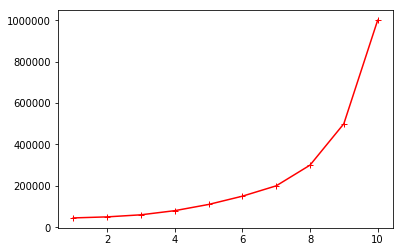

In [287]:
# A new candidate is shortlisted with 20 yrs of exp and current 160K salary. So he wants more than 160K definitely.
# Negotiate based on the model you build from this dataset.
# The HR of the company manages to get the above dataset from the candidates existing company and the following info
# also.
# This person has been a Region Manager for 2 yrs now and usually it takes 4 yrs to jump from a Region Manager to a 
# partner.

# The HR first plotted the graph of level to salary to see the relationship.
# Clearly level vs salary is non-linear
plt.plot(dataset['Level'], dataset['Salary'], color='r', marker='+')

# Also Partner is level 7 and Region Manager is level 6, so he was halfway between level 6 and level 7, say level 6.5
# So the HR can now predict if he is bluffing about his salary.

In [288]:
# We really don't need the Position col as we have the Level column

In [289]:
# We dont want to split into training and test set. Because anyway we have only 10 observations.
# and we need to make very accurate prediction, so we need to have as many observations as possible.

# no feature scaling as the SLR/MLR anyway do it.

# Just create the regressor and fit it.
# We'll create both a Linear Regression and a Polynomial Regression model, so we can compare them.


In [290]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X, y)
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [291]:
# Polynomial Regressor
from sklearn.preprocessing import PolynomialFeatures
# The PolynomialFeature class is actually used to transform our input X to add new cols X^2, X^3, upto X^n
# This way we can then apply the Polynomial Regression on it

In [292]:
poly_reg = PolynomialFeatures

In [293]:
# poly_reg = PolynomialFeatures(degree=2)
# poly_reg = PolynomialFeatures(degree=3)
poly_reg = PolynomialFeatures(degree=4)

In [294]:
poly_reg

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [295]:
X_poly = poly_reg.fit_transform(X)

In [296]:
# A note on X_poly, since degree was 2, 2 new cols were added to X_poly. The original col is actually the middle col
# Thr first col is all ones, which is need just like in MLR, as the intercept needs to be taken care of manually.
# So the PLR equation becomes y = b0x1^0 + b1x1^1 + b2x1^2 + b3x1^3 + ... bnx1^n 
X_poly

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

In [297]:
# Create a new linear regressor and fit it to X_poly
lin_reg_2 = LinearRegression()
lin_reg_2 = lin_reg_2.fit(X_poly, y)

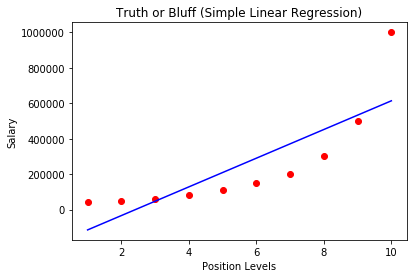

In [298]:
# Lets visualize results and comparing.

# Original values first
plt.scatter(X, y, color='r')

# SLR predictions
plt.plot(X, lin_reg.predict(X), color='b')
plt.title('Truth or Bluff (Simple Linear Regression)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

# What can u interpret? No very good trend line, because other points are very far from the line.
# for level 6.5, HR would have offered close to 300k to the candidate.

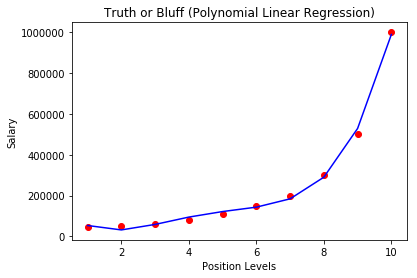

In [299]:
# Original values first
plt.scatter(X, y, color='r')

# PLR predictions
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='b')
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

# So note that a PLR will give you anything but a straight line.
# and for level 6.5, the prediction is about 200K, which is more reasonable.

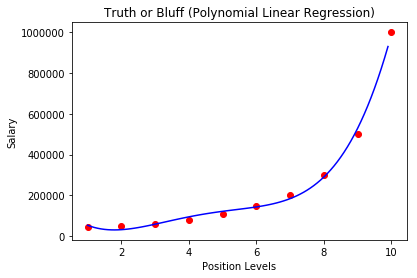

In [301]:
# Go back and add more degree's to the poly_reg and see if there is any change
# Yes, there is, with degree 4, the PLR curve is very accurate, However if you see the graph carefully, you'll 
# see there are some straight lines between the red dots, so what we can do is increase the precision. Right now
# since the level are all integers going from 1 to 10. The step size if 1. So let's reduce this to get a smoother
# curve.
# Lets visualize results and comparing.

# Original values first
plt.scatter(X, y, color='r')

# PLR predictions
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='b')
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

In [302]:
lin_reg.predict(6.5)  # predict salary for 6.5 level using SLR

array([ 330378.78787879])

In [304]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))  # predict salary for 6.5 level using PLR

array([ 158862.45265155])